<a href="https://colab.research.google.com/github/yung-gen1us/dap-2024/blob/main/les06/rep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Лабораторная работа №6. Линейная регрессия**


##**Извлечение данных**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
diabetes = datasets.load_diabetes()

**Задание 1. Выведете описание набора данных и наименование признаков.**

In [ ]:
print("Описание набора данных:")
print(diabetes.DESCR)
print("\nНаименование признаков:")
print(diabetes.feature_names)

Описание набора данных:
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 fe

##**Подготовка данных**
**Задание 2. Из загруженного набора данных создайте DataFrame, содержащий как признаки, так и целевое значение. Выведите первые 5 строк набора.**


In [ ]:
diabetes_df = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)
diabetes_df['target'] = diabetes.target
diabetes_df.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


**Задание 3. Выведете информацию о типах данных в наборе. Имеются ли в наборе категориальные признаки? Имеются ли в наборе данные имеющие значение null?**

In [ ]:
print("Информация о типах данных:")
print(diabetes_df.info())
print("\nNull значения:")
print(diabetes_df.isnull().sum())

Информация о типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None

Null значения:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


##**Исследование данных**
**Задание 4. Постройте матрицу корреляции.**

In [ ]:
matr = diabetes_df.corr()
matr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


**Задание 5. Постройте диаграмму рассеяния целевого значение и признака, коэффициент корреляции которого с целевым значением, самый высокий.**

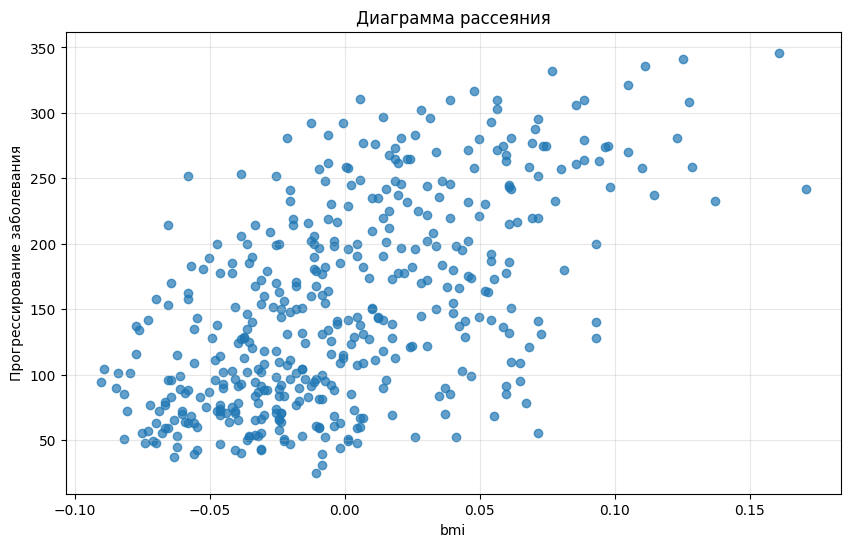

In [ ]:
correlations = diabetes_df.corr()['target'].abs().sort_values(ascending=False)
most_correlated_feature = correlations.index[1]
plt.figure(figsize=(10, 6))
plt.scatter(diabetes_df[most_correlated_feature], diabetes_df['target'], alpha=0.7)
plt.xlabel(most_correlated_feature)
plt.ylabel('Прогрессирование заболевания')
plt.title(f'Диаграмма рассеяния')
plt.grid(True, alpha=0.3)
plt.show()

**Задание 6. Сформируйте набор признаков (X) из 5 признаков с самым высоким коэффициентом корреляции с целевым значением. Сформируйте набор для целевого значения (y).**


In [ ]:
features = matr.loc[matr["target"] != 1, "target"].abs().nlargest(5).index
x = diabetes_df[features]
y = diabetes_df["target"]
print(x, y)

          bmi        s5        bp        s4        s3
0    0.061696  0.019907  0.021872 -0.002592 -0.043401
1   -0.051474 -0.068332 -0.026328 -0.039493  0.074412
2    0.044451  0.002861 -0.005670 -0.002592 -0.032356
3   -0.011595  0.022688 -0.036656  0.034309 -0.036038
4   -0.036385 -0.031988  0.021872 -0.002592  0.008142
..        ...       ...       ...       ...       ...
437  0.019662  0.031193  0.059744 -0.002592 -0.028674
438 -0.015906 -0.018114 -0.067642  0.034309 -0.028674
439 -0.015906 -0.046883  0.017293 -0.011080 -0.024993
440  0.039062  0.044529  0.001215  0.026560 -0.028674
441 -0.073030 -0.004222 -0.081413 -0.039493  0.173816

[442 rows x 5 columns] 0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64


##**Предсказательная модель**
**Задание 7. Разделите набор данных на два, одни для обучения модели другой для проверки. Тестовый набор должен содержать 25 процентов данных.**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.25, random_state=42)

print(f"Размер обучающей выборки: {x_train.shape}")
print(f"Размер тестовой выборки: {x_test.shape}")

Размер обучающей выборки: (110, 5)
Размер тестовой выборки: (332, 5)


**Задание 8. Выполните обучение модели.**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(y_pred[:5])
print(y_test[:5])

[132.80992445 175.05566388 151.18309658 234.55669373 120.24582926]
287    219.0
211     70.0
72     202.0
321    230.0
73     111.0
Name: target, dtype: float64


##**Проверка модели**
**Задача 9. Расчитайте Root mean squared error (RMSE)**

In [ ]:
from sklearn import metrics
print(f'Среднеквадратичная ошибка (RMSE) = {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

Среднеквадратичная ошибка (RMSE) = 58.51740342454687


**Задание 10. Расчитайте R² (коэффициент детерминации)**

In [ ]:
print(f'R2 = {np.sqrt(metrics.r2_score(y_test, y_pred))}')

R2 = 0.6465342225766915


##**Вопросы для защиты**
1. **Какие типы машинного обучения вы знаете?**
+ Обучение с учителем и без учителя
+ Частичное обучение
+ Обучение с подкреплением
---
2. **Чем отличается обучение с учителем и без учителя?**
+ При обучении с учителем обучающие данные, поставляемые вами алгоритму, включают желательные решения, называемые метками (label)
+ При обучении без учителя обучающие данные не помечены. Система пытается обучаться без учителя.
---
3. **Чем пакетное обучение отличается от динамического?**
+ При пакетном об учении система неспособна обучаться постепенно: она должна учиться с применением всех доступных данных.
+ При динамическом обучении вы обучаете систему постепенно за счет последовательного предоставления ей образцов данных либо по отдельности, либо небольшими группами, называемыми мини-пакетами.
---
4. **Чем обучение на основе образцов отличается от обучения на основе модели?**
+ Обучение на основе образцов: система учит примеры на память и затем обобщает их на новые примеры с применением измерения сходства
+ Обучение на основе моделей: предполагает построение модели этих примеров и ее использование для выработки прогнозов
---
5. **Что такое линейная регрессия?**

*Линейная регрессия (Linear regression)* — один из простейший алгоритмов машинного обучения, который используется для моделирования зависимости между одной или несколькими независимыми переменными (факторами) и зависимой переменной (целевой).

Основная цель линейной регрессии — найти оптимальную линейную функцию (в простой форме), которая предсказывает значения зависимой переменной на основе значений независимых переменных.

---
6. **Что такое градиентный спуск?**

Градиентный спуск, метод градиентного спуска — численный метод нахождения локального минимума или максимума функции с помощью движения вдоль градиента, один из основных численных методов современной оптимизации.

---
7. **Как правильно обрабатывать категориальные признаки?**
+ One-Hot Encoding - создание бинарных признаков для каждой категории
+ Label Encoding - присвоение числовых меток категориям (только для tree-based моделей)
+ Target Encoding - замена категории на среднее значение целевой переменной
---
8. **Что такое матрица корреляции?**

Таблица, показывающая попарные корреляции между переменными. Значения от -1 до 1, где:

+ 1: полная положительная корреляция
+ -1: полная отрицательная корреляция
+ 0: отсутствие корреляции

---
9. **Что показывает метрика RMSE?**

Root Mean Squared Error (RMSE) — это метрика, которая измеряет среднеквадратичное отклонение предсказаний модели от фактических значений. Она показывает, насколько далеко находятся предсказания модели от реальных значений в среднем, и используется для оценки точности модели

---
10. **Что показывает метрика R²?**

R² (коэффициент детерминации) — это статистическая метрика, которая измеряет, насколько хорошо предсказания модели соответствуют реальным значениям. Его значения варьируются от 0 до 1, где:
+ 1: модель идеально объясняет данные
+ 0: модель не лучше, чем простое среднее
+ Может быть отрицательным, если модель хуже среднего